<a href="https://colab.research.google.com/github/sanvikarthik/computernetworks/blob/main/computergraphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

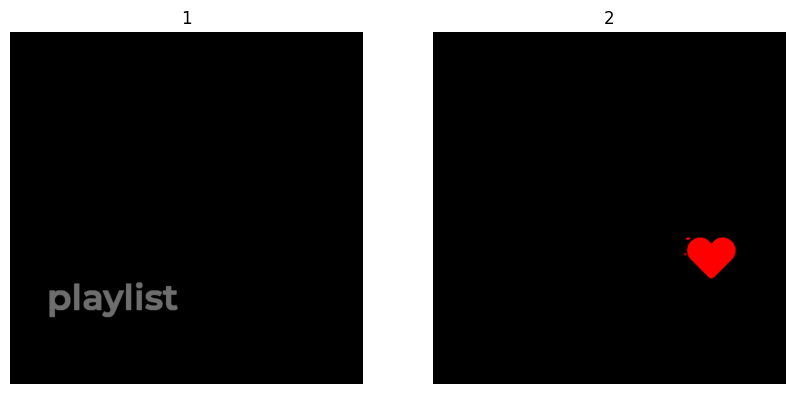

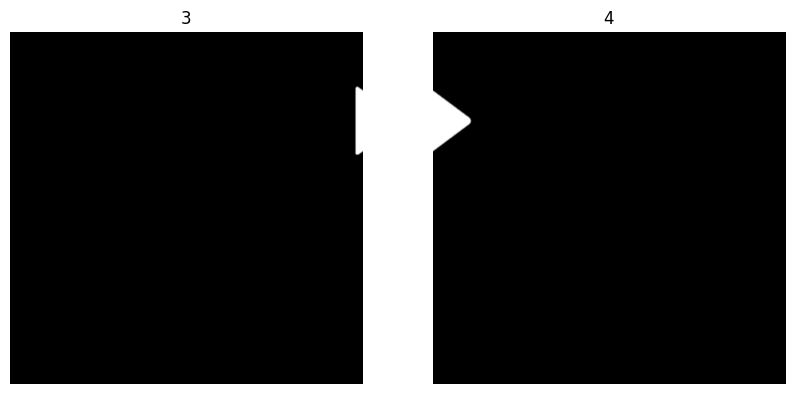

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt # Importing matplotlib.pyplot
# Read the image
img = cv2.imread("music.png")
# Get the height and width of the image
height, width = img.shape[:2]
# Split the image into four quadrants
quad1 = img[:height//2, :width//2] # slices the image to get the top-left quadrant.
quad2 = img[:height//2, width//2:] #slices the image to get the top-right quadrant.
quad3 = img[height//2:, :width//2] #slices the image to get the bottom-left quadrant.
quad4 = img[height//2:, width//2:] #slices the image to get the bottom-right quadrant.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(quad1, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB
plt.title("1")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(quad2, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB
plt.title("2")
plt.axis("off")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(quad3, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB
plt.title("3")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(quad4, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB
plt.title("4")
plt.axis("off")
plt.show()

Enter the degree of Rotation (between -180 and 180): 50
Enter the zooming factor (between 0.1 and 10): 2
How many pixels you want the image to be translated horizontally? 2
How many pixels you want the image to be translated vertically? 2


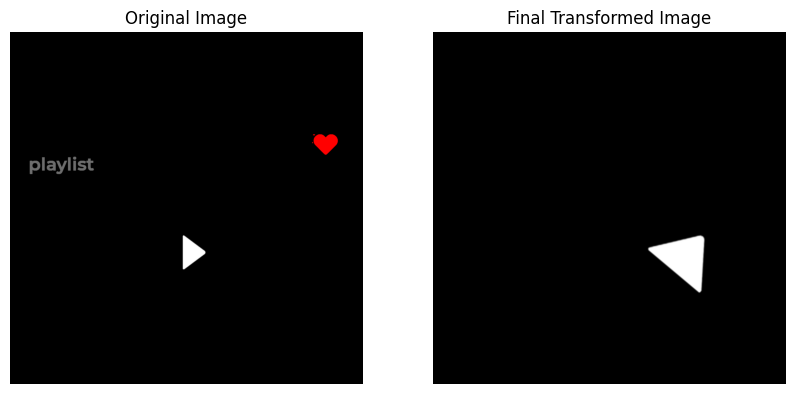

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def translate_image(image, dx, dy):
 rows, cols = image.shape[:2]
 translation_matrix = np.float32([[1, 0, dx], [0, 1, dy]])
 translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
 return translated_image
# Read the image
image = cv2.imread("music.png")
# Convert the image from BGR to RGB for correct color display in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Get image dimensions
height, width = image.shape[:2]
# Calculate the center coordinates of the image
center = (width // 2, height // 2)
# Get rotation and scaling values from the user
rotation_value = int(input("Enter the degree of Rotation (between -180 and 180): "))
while rotation_value < -180 or rotation_value > 180:
 rotation_value = int(input("Invalid input. Enter the degree of Rotation (between -180 and 180): "))
scaling_value = float(input("Enter the zooming factor (between 0.1 and 10): "))
while scaling_value < 0.1 or scaling_value > 10:
 scaling_value = float(input("Invalid input. Enter the zooming factor (between 0.1 and 10): "))
# Create the 2D rotation matrix
rotated = cv2.getRotationMatrix2D(center=center, angle=rotation_value, scale=1)
rotated_image = cv2.warpAffine(src=image, M=rotated, dsize=(width, height))
# Create the 2D scaling matrix
scaled = cv2.getRotationMatrix2D(center=center, angle=0, scale=scaling_value)
scaled_image = cv2.warpAffine(src=rotated_image, M=scaled, dsize=(width, height))
# Get translation values from the user
h = int(input("How many pixels you want the image to be translated horizontally? "))
v = int(input("How many pixels you want the image to be translated vertically? "))
# Translate the image
translated_image = translate_image(scaled_image, dx=h, dy=v)
# Convert the final transformed image from BGR to RGB
translated_image_rgb = cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB)
# Save the final transformed image
cv2.imwrite('Final_image.png', translated_image)
# Display the original and final transformed images using subplots
plt.figure(figsize=(10, 5)) # Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
# Display the final transformed image
plt.subplot(1, 2, 2)
plt.imshow(translated_image_rgb)
plt.title("Final Transformed Image")
plt.axis("off")
plt.show()

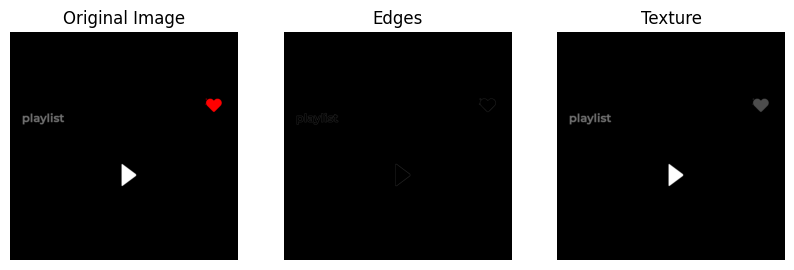

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
image_path = "music.png"
img = cv2.imread(image_path)
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Edge detection
edges = cv2.Canny(gray, 100, 200) # Use Canny edge detector
# Texture extraction
kernel = np.ones((5, 5), np.float32) / 25 # Define a 5x5 averaging kernel
texture = cv2.filter2D(gray, -1, kernel) # Apply the averaging filter for texture extraction
# Display the original image, edges, and texture using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Edges")
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("Texture")
plt.imshow(texture, cmap='gray')
plt.axis('off')
plt.show()


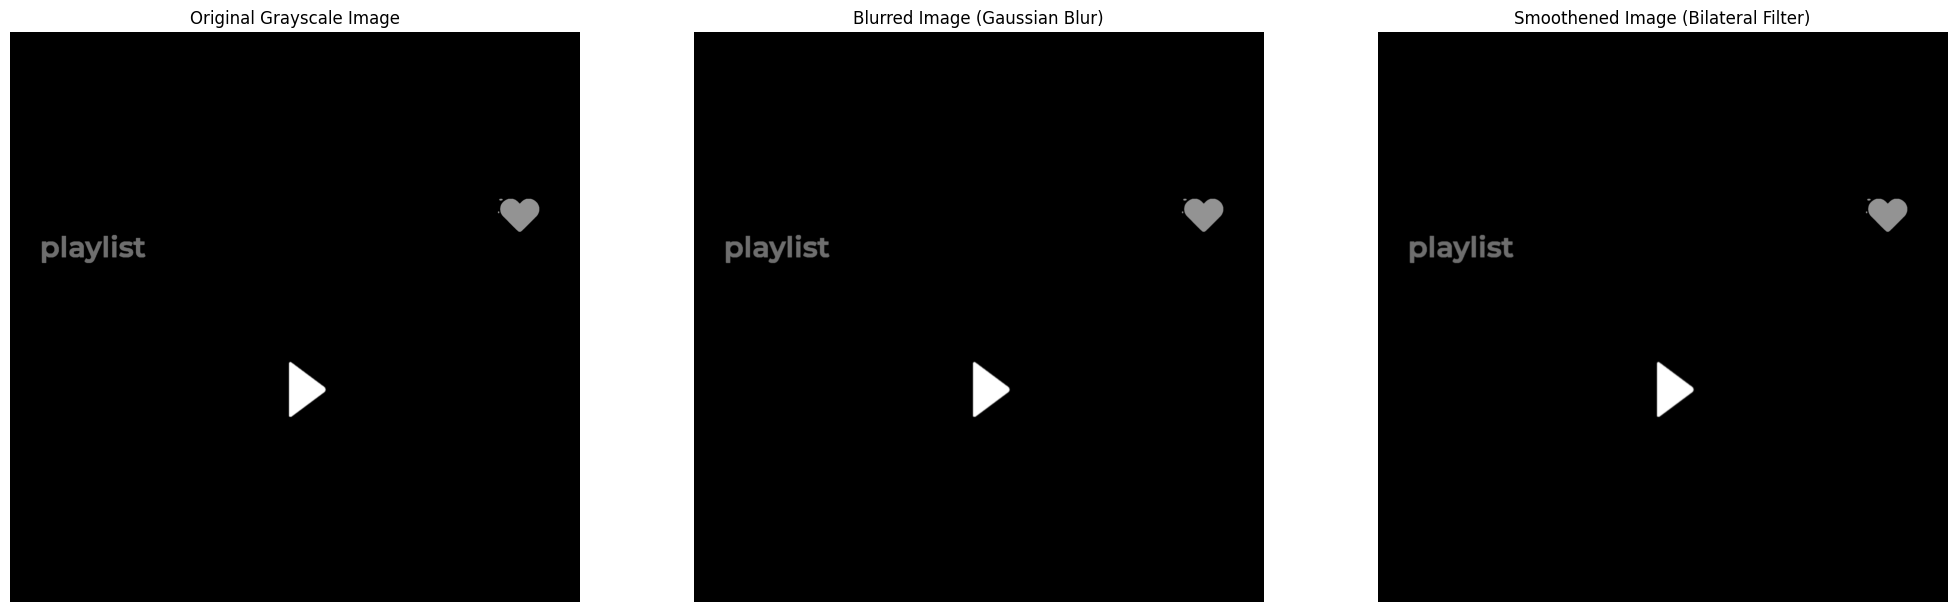

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image in grayscale
img = cv2.imread("music.png", cv2.IMREAD_GRAYSCALE)
# Apply Gaussian blur (blurring)
gaussian_blur = cv2.GaussianBlur(img, (5, 5), 0)
# Apply bilateral filter (smoothening)
bilateral_blur = cv2.bilateralFilter(img, 9, 75, 75)
# Display the original, blurred, and smoothened images using matplotlib
plt.figure(figsize=(25, 10))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(gaussian_blur, cmap='gray')
plt.title("Blurred Image (Gaussian Blur)")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(bilateral_blur, cmap='gray')
plt.title("Smoothened Image (Bilateral Filter)")
plt.axis("off")
plt.show()

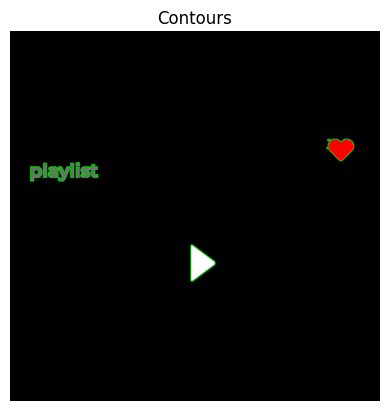

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Read the image
image = cv2.imread('music.png')
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# Apply adaptive thresholding with adjusted parameters
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY_INV, 15, 4)
# Find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Draw the contours on the original image
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
# Convert BGR image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image with contours using matplotlib
plt.imshow(image_rgb)
plt.title('Contours')
plt.axis('off') # Hide axis
plt.show()

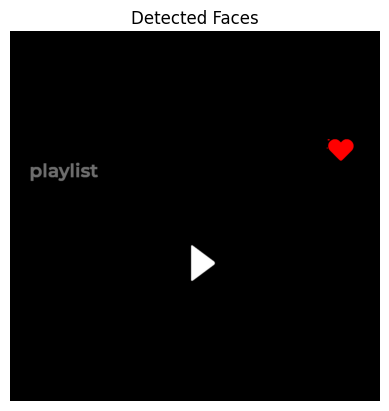

In [ ]:
import cv2
import matplotlib.pyplot as plt
# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
# Read the input image
image_path = 'music.png'
image = cv2.imread(image_path)
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
# Draw rectangles around detected faces
for (x, y, w, h) in faces:
 cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
# Convert BGR image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image with detected faces using matplotlib
plt.imshow(image_rgb)
plt.title('Detected Faces')
plt.axis('off') # Hide axis
plt.show()